# Test: Bestimmung Precision / Recall
Um die Klassifikation, und damit auch von dem Aufbau unserer Matrix, zu testen, bestimmen wir Precision und Recall.

* Precision: Wieviele der zugeordneten Samples sind tatsächlich relevant? (true pos.) / (true pos. + false pos.)
* Recall: Wieviele der tatsächlich relevanten Samples wurden gefunden / zugeordnet? (true pos.) / (true pos. + false neg.)
 * Tiefe Precision / hoher Recall: Es werden viele Samples zugeordnet, von denen jedoch viele falsch sind
 * Hohe Precision / tiefer Recall: Es werden nur wenige Samples zugeordnet, von denen jedoch die meisten stimmen.
<img src="img/Precisionrecall.png" alt="Drawing" style="width: 200px"/>

## Optimierung
Mit diesem Test versuchen wir die Konfiguration der SVM möglichst gut auf unsere Datenstruktur auszurichten.
### Kernel
Der Kernel definiert, mit welcher Art Funktion die Datenpunkte im 2D-Raum voneinander getrennt werden. Standardmässig wird dazu eine lineare Funktion (linear kernel) verwendet. Wenn die Punkte im training set nicht durch eine Gerade trennbar sind, versucht man sie in einer höheren Dimension voneinander zu trennen. Die erreicht man durch andere kernel-Funktionen (z.B. Polynomial oder RBF).
Bei vielen Features, wie es bei unseren Daten der Fall ist, bringt eine höhere Dimension keine Vorteile, ist aber sehr teuer. Entsprechend verwenden wir einen linearen Kernel.

#### Parameter
Der lineare Kernel verlangt ausschliesslich einen Penalty Parameter C. Beim einem hohen C versucht der Classifier die Ebene so zu legen, dass möglichst wenige Datenpunkte aus dem training set falsch klassifiziert sind. Dafür nimmt er ein kleineres Margin zwischen Ebene und Punkte in Kauf. Bei einem tiefen Wert für C sucht der Classifier nach einem möglichst hohen margin, nimmt aber falsche Klassifizierungen im trianing set in Kauf.

### Bestimmung Parameter C
Evaluation mit 2000 samples im test set:
* C=0.1: Precision 0.777777777778, Recall 0.21875
* C=0.2: Precision 0.785714285714, Recall 0.34375
* C=0.3: Precision 0.769230769231, Recall 0.3125
* C=0.4: Precision 0.714285714286, Recall 0.3125
* C=0.5: Precision 0.666666666667, Recall 0.3125
* C=0.6: Precision 0.555555555556, Recall 0.3125
* C=0.7: Precision 0.555555555556, Recall 0.3125
* C=0.8: Precision 0.578947368421, Recall 0.34375
* C=0.9: Precision 0.578947368421, Recall 0.34375
* C=1: Precision 0.578947368421, Recall 0.34375

### Test mit Parameter C
#### Test mit Matrix V1
C=0.2
* Samples 1000: Precision 1.0, Recall 0.240740740741
* Samples 2000: Precision 0.833333333333, Recall 0.37037037037
* Samples 5000: Precision 0.785714285714, Recall 0.407407407407
* Samples 10000: Precision 0.821428571429, Recall 0.425925925926
* Samples 15000: Precision 0.896551724138, Recall 0.481481481481

#### Test mit Matrix V2 
C=0.2
* Samples 1000: Precision 1.0, Recall 0.327272727273
* Samples 2000: Precision 0.9375, Recall 0.545454545455
* Samples 5000: Precision 0.885714285714, Recall 0.563636363636
* Samples 10000: Precision 0.861111111111, Recall 0.563636363636
* Samples 15000: Precision 0.916666666667, Recall 0.6

Samples=15000
* C=0.2: Precision 0.916666666667, Recall 0.6
* C=0.6: Precision 0.888888888889, Recall 0.727272727273
* C=1.0: Precision 0.816326530612, Recall 0.727272727273

#### Test mit 1/3 und 2/3 bei 15000 Samples
* #1: Precision 0.955922865014, Recall 0.805104408353
* #2: Precision 0.937555753791, Recall 0.812838360402
* #3: Precision 0.956014362657, Recall 0.823665893271
* #4: Precision 0.950628366248, Recall 0.819025522042
* #5: Precision 0.946654611212, Recall 0.809744779582

#### Test mit Matrix V3
* #1: Precision 0.89219858156, Recall 0.643807574207

#### Test mit Klassifikationsmatrix
* #1: Precision 0.89248434238, Recall 0.707196029777
* #2: Precision 0.887804878049, Recall 0.752688172043
* #3 Precision 0.897177419355, Recall 0.736145574855
* #4 Precision 0.881592039801, Recall 0.732837055418
* #5 Precision 0.893551688843, Recall 0.722084367246
* #6 Precision 0.892966360856, Recall 0.724565756824
* #7 Precision 0.89296333003, Recall 0.745244003309
* #8 Precision 0.895895895896, Recall 0.740281224152
* #9 Precision 0.886294416244, Recall 0.722084367246
* #10 Precision 0.896586345382, Recall 0.738626964433
* #11 Precision 0.8921859545, Recall 0.746071133168
* #12 Precision 0.908163265306, Recall 0.736145574855
* #13 Precision 0.880445795339, Recall 0.718775847808
* #14 Precision 0.890816326531, Recall 0.722084367246
* #15 Precision 0.907237512742, Recall 0.736145574855
------ sum ----
Precision: sum: 13.3961655713 durchschnitt: 0.89307770475
Recall: sum: 10.9809760132 durchschnitt: 0.732065067549

In [7]:
import time
import matplotlib.pyplot as plt
import numpy as np
import cPickle as pickle

from imports.sparse_reader import get_matrices
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve

# Read pickle
feature_matrix = get_matrices('data/feature_matrix_sparse_classification.pickle')[0]

#feature_matrix = feature_matrix[:1000, :]

samples_count = feature_matrix.shape[0]
features_count = feature_matrix.shape[1] - 1

# Create own matrices for vulenrable and not vulnerable components
vulnerable = (feature_matrix[np.where(feature_matrix[:,-1] != 0),:])[0]
not_vulnerable = (feature_matrix[np.where(feature_matrix[:,-1] == 0),:])[0]

precision_sum = 0.89248434238 + 0.887804878049
recall_sum = 0.707196029777 + 0.752688172043
print("Total Anzahl Samples: {}".format(samples_count))
print("Anzahl verwundbare Samples: {}".format(vulnerable.shape[0]))
print("Anzahl nicht verwundbare Samples: {}".format(not_vulnerable.shape[0]))

vulnerable_count = vulnerable.shape[0]
not_vulnerable_count = not_vulnerable.shape[0]


for i in [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    # Split into training sets (2/3) and test sets (1/3)
    not_vulnerable_training = not_vulnerable[np.random.choice(not_vulnerable.shape[0], (not_vulnerable_count * 2 / 3), replace=False), :]
    not_vulnerable_test = not_vulnerable[np.random.choice(not_vulnerable.shape[0], (not_vulnerable_count / 3), replace=False), :]

    vulnerable_training = vulnerable[np.random.choice(vulnerable.shape[0], (vulnerable_count * 2 / 3), replace=False), :]
    vulnerable_test = vulnerable[np.random.choice(vulnerable.shape[0], (vulnerable_count / 3), replace=False), :]

    # Concatenate vulnerable and not vulnerable matrices
    training_set = np.concatenate((not_vulnerable_training, vulnerable_training), axis=0)
    test_set = np.concatenate((not_vulnerable_test, vulnerable_test), axis=0)

    # Split sets into data and target
    training_data = training_set[:, range(features_count)]
    training_target = training_set[:, features_count]
    training_target[training_target > 1] = 1

    test_data = test_set[:, range(features_count)]
    test_target = test_set[:, features_count]
    test_target[test_target > 1] = 1

    start = time.time()

    # Create classifier
    clf = svm.SVC(kernel='linear', C=0.2)

    # Fit model
    clf.fit(training_data, training_target)

    # Predict remaining data
    target_prediction = clf.predict(test_data)

    # Compute Precision-Recall
    precision, recall, thresholds = precision_recall_curve(test_target, target_prediction)

    precision_sum += precision[1]
    recall_sum += recall[1]

    # Print Precision and Recall
    print('* #{} Precision {}, Recall {}'.format(i, precision[1], recall[1]))

precision_schnitt = precision_sum / 15
recall_schnitt = recall_sum / 15
print('------ sum ----')
print('Precision: sum: {} durchschnitt: {}'.format(precision_sum, precision_schnitt))
print('Recall: sum: {} durchschnitt: {}'.format(recall_sum, recall_schnitt))




Total Anzahl Samples: 19550
Anzahl verwundbare Samples: 3628
Anzahl nicht verwundbare Samples: 15922
* #3 Precision 0.897177419355, Recall 0.736145574855
* #4 Precision 0.881592039801, Recall 0.732837055418
* #5 Precision 0.893551688843, Recall 0.722084367246
* #6 Precision 0.892966360856, Recall 0.724565756824
* #7 Precision 0.89296333003, Recall 0.745244003309
* #8 Precision 0.895895895896, Recall 0.740281224152
* #9 Precision 0.886294416244, Recall 0.722084367246
* #10 Precision 0.896586345382, Recall 0.738626964433
* #11 Precision 0.8921859545, Recall 0.746071133168
* #12 Precision 0.908163265306, Recall 0.736145574855
* #13 Precision 0.880445795339, Recall 0.718775847808
* #14 Precision 0.890816326531, Recall 0.722084367246
* #15 Precision 0.907237512742, Recall 0.736145574855
------ sum ----
Precision: sum: 13.3961655713 durchschnitt: 0.89307770475
Recall: sum: 10.9809760132 durchschnitt: 0.732065067549


Total Anzahl Samples: 19550
Anzahl verwundbare Samples: 3628
Anzahl nicht verwundbare Samples: 15922
------------------------------
Prozentsatz verwundbare Komponenten im Testset:       18.6%
Prozentsatz verwundbare Komponenten im Prediction Vektor:       15.7%
------------------------------
Precision 0.887804878049, Recall 0.752688172043
time:       39.5min


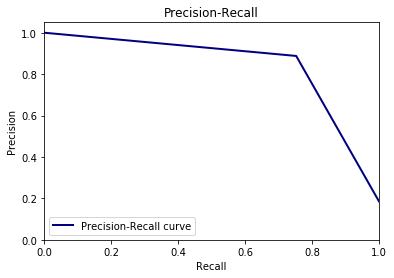

In [6]:
import time
import matplotlib.pyplot as plt
import numpy as np
import cPickle as pickle

from imports.sparse_reader import get_matrices
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve

# Read pickle
feature_matrix = get_matrices('data/feature_matrix_sparse_classification.pickle')[0]

#feature_matrix = feature_matrix[:1000, :]

samples_count = feature_matrix.shape[0]
features_count = feature_matrix.shape[1] - 1

# Create own matrices for vulenrable and not vulnerable components
vulnerable = (feature_matrix[np.where(feature_matrix[:,-1] != 0),:])[0]
not_vulnerable = (feature_matrix[np.where(feature_matrix[:,-1] == 0),:])[0]

print("Total Anzahl Samples: {}".format(samples_count))
print("Anzahl verwundbare Samples: {}".format(vulnerable.shape[0]))
print("Anzahl nicht verwundbare Samples: {}".format(not_vulnerable.shape[0]))

vulnerable_count = vulnerable.shape[0]
not_vulnerable_count = not_vulnerable.shape[0]

# Split into training sets (2/3) and test sets (1/3)
not_vulnerable_training = not_vulnerable[np.random.choice(not_vulnerable.shape[0], (not_vulnerable_count * 2 / 3), replace=False), :]
not_vulnerable_test = not_vulnerable[np.random.choice(not_vulnerable.shape[0], (not_vulnerable_count / 3), replace=False), :]

vulnerable_training = vulnerable[np.random.choice(vulnerable.shape[0], (vulnerable_count * 2 / 3), replace=False), :]
vulnerable_test = vulnerable[np.random.choice(vulnerable.shape[0], (vulnerable_count / 3), replace=False), :]

# Concatenate vulnerable and not vulnerable matrices
training_set = np.concatenate((not_vulnerable_training, vulnerable_training), axis=0)
test_set = np.concatenate((not_vulnerable_test, vulnerable_test), axis=0)

# Split sets into data and target
training_data = training_set[:, range(features_count)]
training_target = training_set[:, features_count]
training_target[training_target > 1] = 1

test_data = test_set[:, range(features_count)]
test_target = test_set[:, features_count]
test_target[test_target > 1] = 1

start = time.time()

# Create classifier
clf = svm.SVC(kernel='linear', C=0.2)

# Fit model
clf.fit(training_data, training_target)

# Predict remaining data
target_prediction = clf.predict(test_data)

vulnerable_target_test = (test_target[test_target > 0]).size * 100.0 / test_target.size
vulnerable_target_prediction = (target_prediction[target_prediction > 0]).size * 100.0 / target_prediction.size
print("------------------------------")
print("Prozentsatz verwundbare Komponenten im Testset: {0:10.1f}%".format(vulnerable_target_test))
print("Prozentsatz verwundbare Komponenten im Prediction Vektor: {0:10.1f}%".format(vulnerable_target_prediction))
print("------------------------------")

# Compute Precision-Recall
precision, recall, thresholds = precision_recall_curve(test_target, target_prediction)

end = time.time()
elapsed = (end - start) / 60

# Print Precision and Recall
print('Precision {}, Recall {}'.format(precision[1], recall[1]))
print('time: {0:10.1f}min'.format(elapsed))
# Plot precision-recall-curve
plt.clf()
plt.plot(recall, precision, lw=2, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall')
plt.legend(loc="lower left")
plt.show()
